In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np

In [3]:
folder = "BBBC037"
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental results/{folder}/Classification_reports/"
dataset = "taorf"
partitions = ["cells-out", "plates-out"]
subsets = ["full-dataset", "training-set", "validation-set"]
epochs = ["epoch" + str(x).zfill(2) for x in range(5,35,5)]

# Learning curves

In [4]:
view = []
for p in partitions:
  for s in subsets:
    for e in epochs:
      data = pd.read_csv(path + f"{dataset}_classification_{p}_{s}_{e}.csv", index_col=0)
      acc = data.loc["accuracy","support"]
      mavg = data.loc["macro avg"]
      view.append({"Partition":p, "Subset":s, "Epoch":e, "Accuracy":acc, "Precision":mavg.precision, "Recall":mavg.recall, "F1-score":mavg["f1-score"]})
view = pd.DataFrame(data=view)

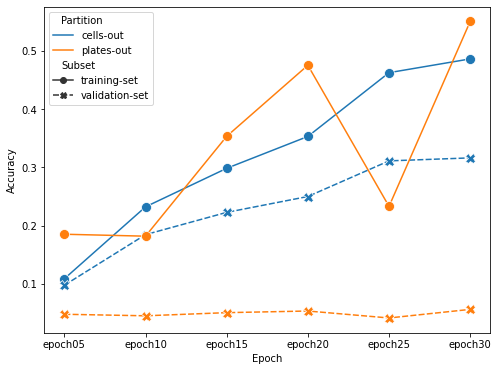

In [5]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="Accuracy", hue="Partition", style="Subset", markers=True, markersize=10)

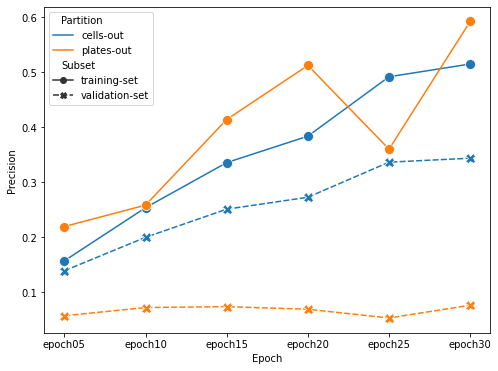

In [6]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="Precision", hue="Partition", style="Subset", markers=True, markersize=10)

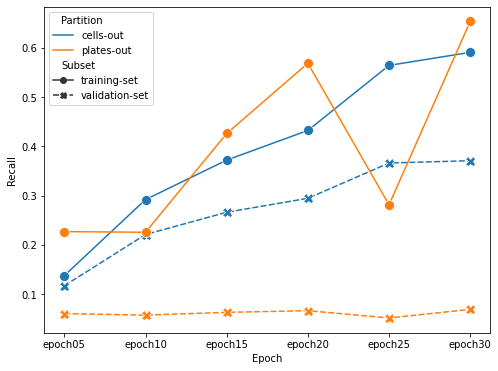

In [7]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="Recall", hue="Partition", style="Subset", markers=True, markersize=10)

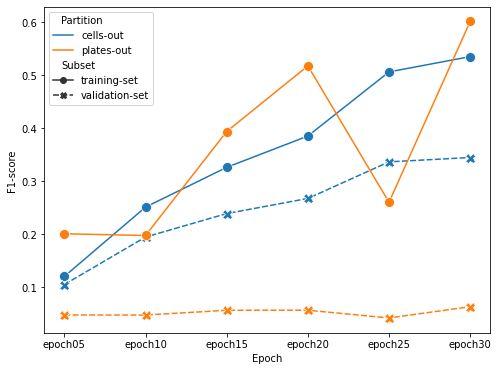

In [8]:
plt.figure(figsize=(8,6))
sb.lineplot(data=view[view.Subset != "full-dataset"], x="Epoch", y="F1-score", hue="Partition", style="Subset", markers=True, markersize=10)

# Performance per class

In [9]:
data = pd.read_csv(path + f"{dataset}_classification_{partitions[0]}_{subsets[2]}_{epochs[-1]}.csv", index_col=0)
cells_out = data.loc[data.index[0:206]]
cells_out["Partition"] = "cells-out"
data = pd.read_csv(path + f"{dataset}_classification_{partitions[1]}_{subsets[2]}_{epochs[-1]}.csv", index_col=0)
plates_out = data.loc[data.index[0:206]]
plates_out["Partition"] = "plates-out"

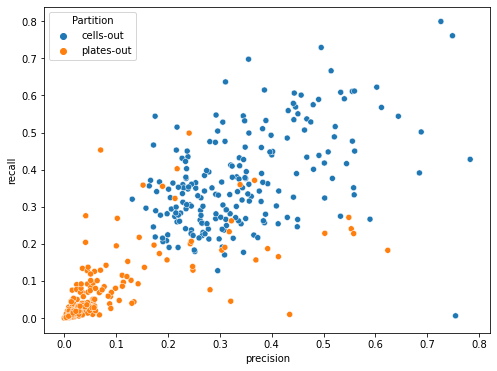

In [10]:
view = pd.concat((cells_out, plates_out))
plt.figure(figsize=(8,6))
sb.scatterplot(data=view, x="precision", y="recall", hue="Partition")

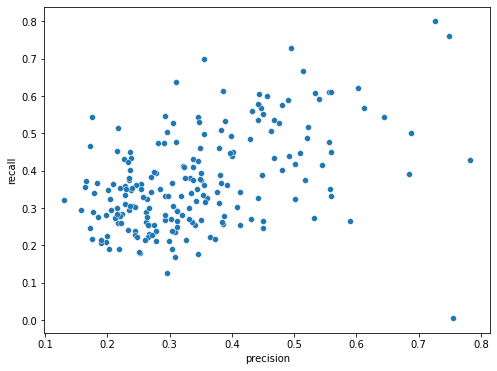

In [11]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=cells_out, x="precision", y="recall")

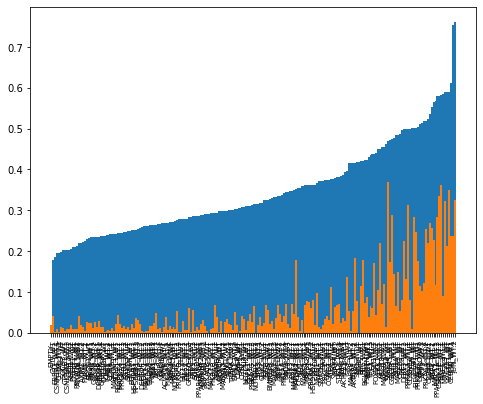

In [12]:
idx = cells_out.sort_values(by="f1-score").index
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(idx, cells_out.loc[idx, "f1-score"], width=1.0)
plt.bar(idx, plates_out.loc[idx, "f1-score"], width=1.0)
t = plt.xticks(fontsize=7, rotation=90)

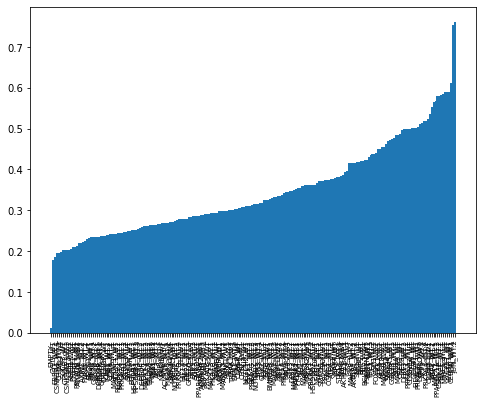

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
plt.bar(idx, cells_out.loc[idx, "f1-score"], width=1.0)
t = plt.xticks(fontsize=7, rotation=90)

In [14]:
print("Bottom and Top classes")
cells_out.loc[idx]

Bottom and Top classes


,precision,recall,f1-score,support,Partition
EMPTY_,0.754569,0.005829,0.011568,49581.0,cells-out
CYLD_WT,0.295807,0.127467,0.178162,2989.0,cells-out
ERBB2_WT.2,0.130913,0.320281,0.185857,1711.0,cells-out
CSNK1A1_WT.1,0.175289,0.218398,0.194483,1598.0,cells-out
CHUK_WT.2,0.201991,0.190221,0.195930,1493.0,cells-out
...,...,...,...,...,...
DLL1_WT,0.644265,0.543873,0.589828,1322.0,cells-out
WWTR1_WT,0.495403,0.729308,0.590019,1921.0,cells-out
CEBPA_WT.2,0.602589,0.622326,0.612299,1496.0,cells-out
JUN_WT.1,0.748660,0.760896,0.754728,1652.0,cells-out


# Classification performance vs downstream analysis

In [15]:
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental results/{folder}/mAP_FoE/Indiv_dataset/Cells_out/conv6a/"
trt_index = pd.read_csv(f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental results/{folder}/TAORF_MOA_MATCHES_official.csv")
downstream = pd.read_csv(path + "efn128cellsout_conv6a_1e-4_e30.csv", index_col=0)
downstream = pd.merge(downstream, trt_index, left_on="Var1", right_on="broad_sample")
downstream = pd.merge(downstream, cells_out, left_on="pert_name", right_index=True)

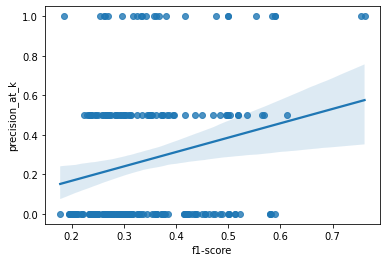

In [16]:
sb.regplot(data=downstream, x="f1-score", y="precision_at_k")

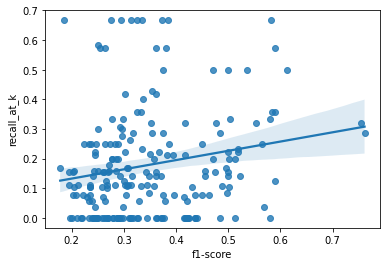

In [17]:
sb.regplot(data=downstream, x="f1-score", y="recall_at_k")

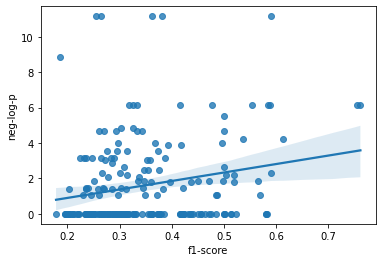

In [18]:
downstream["neg-log-p"] = -np.log(downstream["p-value"])
sb.regplot(data=downstream, x="f1-score", y="neg-log-p")

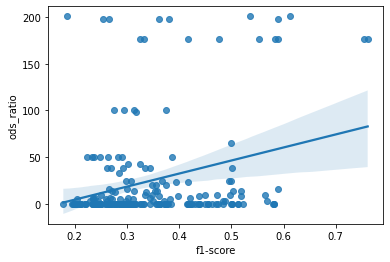

In [19]:
sb.regplot(data=downstream, x="f1-score", y="ods_ratio")

In [20]:
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental results/{folder}/First_hit/Indiv_dataset/Cells_out/conv6a/"
'''
FH_efn128cellsout_conv6a_1e-4_e30_image_level.csv
FH_efn128cellsout_conv6a_1e-4_e30_moa.csv
FH_efn128cellsout_conv6a_1e-4_e30_treatment_level.csv
FH_efn128cellsout_conv6a_1e-4_e30_well_level.csv
'''

'\nFH_efn128cellsout_conv6a_1e-4_e30_image_level.csv\nFH_efn128cellsout_conv6a_1e-4_e30_moa.csv\nFH_efn128cellsout_conv6a_1e-4_e30_treatment_level.csv\nFH_efn128cellsout_conv6a_1e-4_e30_well_level.csv\n'

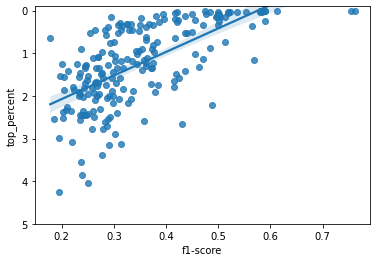

In [21]:
first_hit = pd.read_csv(path + "FH_efn128cellsout_conv6a_1e-4_e30_image_level.csv", index_col=0)
first_hit = pd.merge(first_hit, cells_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent")
g.set(ylim=(-0.1, 5))
g.invert_yaxis()

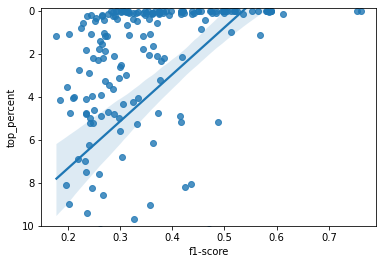

In [22]:
first_hit = pd.read_csv(path + "FH_efn128cellsout_conv6a_1e-4_e30_well_level.csv", index_col=0)
first_hit = pd.merge(first_hit, cells_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent")
g.set(ylim=(-0.1, 10))
g.invert_yaxis()

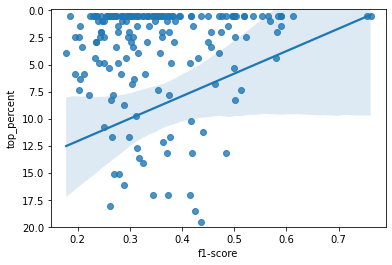

In [23]:
first_hit = pd.read_csv(path + "FH_efn128cellsout_conv6a_1e-4_e30_treatment_level.csv", index_col=0)
first_hit = pd.merge(first_hit, cells_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent")
g.set(ylim=(-0.1, 20))
g.invert_yaxis()

In [24]:
path = f"/content/drive/MyDrive/DeepProfiler/DeepProfiler-docs/Experimental results/{folder}/First_hit/Indiv_dataset/Plates_out/conv6a/"
'''
FH_efn128platesout_conv6a_1e-4_e30_image_level.csv
FH_efn128platesout_conv6a_1e-4_e30_moa.csv
FH_efn128platesout_conv6a_1e-4_e30_treatment_level.csv
FH_efn128platesout_conv6a_1e-4_e30_well_level.csv
'''

'\nFH_efn128platesout_conv6a_1e-4_e30_image_level.csv\nFH_efn128platesout_conv6a_1e-4_e30_moa.csv\nFH_efn128platesout_conv6a_1e-4_e30_treatment_level.csv\nFH_efn128platesout_conv6a_1e-4_e30_well_level.csv\n'

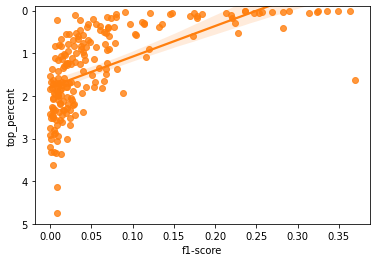

In [25]:
first_hit = pd.read_csv(path + "FH_efn128platesout_conv6a_1e-4_e30_image_level.csv", index_col=0)
first_hit = pd.merge(first_hit, plates_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent", color="tab:orange")
g.set(ylim=(-0.1, 5))
g.invert_yaxis()

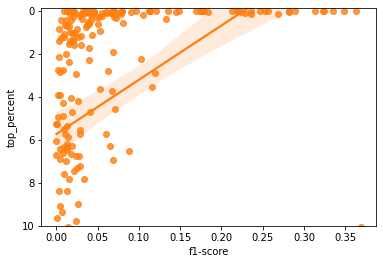

In [26]:
first_hit = pd.read_csv(path + "FH_efn128platesout_conv6a_1e-4_e30_well_level.csv", index_col=0)
first_hit = pd.merge(first_hit, plates_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent", color="tab:orange")
g.set(ylim=(-0.1, 10))
g.invert_yaxis()

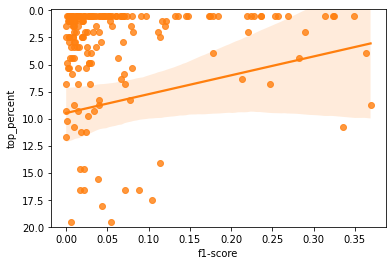

In [27]:
first_hit = pd.read_csv(path + "FH_efn128platesout_conv6a_1e-4_e30_treatment_level.csv", index_col=0)
first_hit = pd.merge(first_hit, plates_out, left_on="pert_name", right_index=True)
g = sb.regplot(data=first_hit, x="f1-score", y="top_percent", color="tab:orange")
g.set(ylim=(-0.1, 20))
g.invert_yaxis()